In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv')

In [3]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [5]:
occupation_set = set(df['Occupation'])
print(occupation_set)

{'Exec-managerial', 'Farming-fishing', 'Machine-op-inspct', 'Craft-repair', 'Adm-clerical', 'Prof-specialty', 'Tech-support', 'Handlers-cleaners', 'Priv-house-serv', '?', 'Protective-serv', 'Armed-Forces', 'Sales', 'Transport-moving', 'Other-service'}


In [6]:
df['Occupation'] = df['Occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [7]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,6,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,1,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,14,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,6,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,0,Own-child,White,United-States,<=50K


In [8]:
education_set = set(df['Education'])
print(education_set)

{'12th', 'Bachelors', 'Assoc-acdm', 'HS-grad', '10th', 'Masters', '9th', 'Prof-school', '7th-8th', 'Some-college', 'Assoc-voc', 'Preschool', '11th', '5th-6th', 'Doctorate', '1st-4th'}


In [9]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,6,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,1,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,14,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,6,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,0,Own-child,White,United-States,<=50K


In [10]:
income_set = set(df['Income'])
print(income_set)

{'>50K', '<=50K'}


In [11]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [12]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,6,Own-child,Black,United-States,0
1,38,Male,Private,HS-grad,Married-civ-spouse,1,Husband,White,United-States,0
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,14,Husband,White,United-States,1
3,44,Male,Private,Some-college,Married-civ-spouse,6,Husband,Black,United-States,1
4,18,Female,?,Some-college,Never-married,0,Own-child,White,United-States,0


In [13]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='Occupation'>

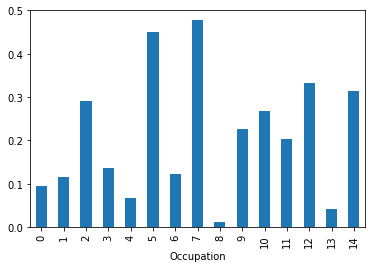

In [14]:
df.groupby('Occupation').Income.mean().plot(kind='bar')

In [15]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = df[['Age', 'Occupation']]

# Taking the labels (Income)
Y = df['Income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7595455010748285
